# Experiment 4

Final experiment for the relevant models in the uni- and multivariate setting

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 400

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

# Retrieve color cycle from ggplot style
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#print(colors)

# Map models to specific colors
color_map = {'iTransformer': colors[0], 'PatchTST': colors[1], 'Autoformer': colors[2], 'Informer': colors[3], 'Transformer': colors[4], 
             'TSMixer': colors[5], 'DLinear': colors[6], 'LSTM': colors[7], 
             'XGBoost': colors[8], 'Linear Regression': colors[9], 'Ridge': colors[9]}

%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp4_benchmark_test_set'

In [95]:
targets = ["multi", "load", "solar", "wind"] 
horizons = ['24', '96', '192', '336', '720']  
models = ['iTransformer', 'PatchTST', 'Transformer', "LSTM", "XGBoost", "Linear Regression", "Ridge"]
metrics = ['MSE', 'MAE']  

## Import data and plot all benchmark results

In [96]:
idx = pd.IndexSlice
benchmark_table = pd.read_csv("./../../results/benchmark_table_Exp4_metrics.csv", header=[0, 1], index_col=[0, 1]).loc[['multi', 'load'], idx[models, :]].replace('-', np.nan).astype(float)
epoch_time_table = pd.read_csv("./../../results/benchmark_table_Exp4_epoch_time.csv", header=[0, 1], index_col=[0, 1]).loc['multi', idx[models, :]].replace('-', np.nan).astype(float)
modelsize_maxmemory_table = pd.read_csv("./../../results/benchmark_table_Exp4_modelsize_maxmemory.csv", header=[0, 1], index_col=[0, 1]).loc['multi', idx[models, :]].replace('-', np.nan).astype(float)

benchmark_table = benchmark_table.drop(columns="Linear Regression")
#benchmark_table = pd.concat((benchmark_table, benchmark_table2), axis=1)
#models.append("Ridge Regression")
benchmark_table

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_2246/1503901458.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  benchmark_table = benchmark_table.drop(columns="Linear Regression")


Model          iTransformer         PatchTST         Transformer          \
Metric                  MSE     MAE      MSE     MAE         MSE     MAE   
Target Horizon                                                             
multi  24               NaN     NaN      NaN     NaN      0.0592  0.1596   
       96               NaN     NaN      NaN     NaN      0.0670  0.1688   
       192              NaN     NaN      NaN     NaN      0.0643  0.1685   
       336              NaN     NaN      NaN     NaN      0.0688  0.1762   
       720              NaN     NaN      NaN     NaN      0.0722  0.1809   
load   24            0.0229  0.1040   0.0248  0.1057      0.0211  0.1098   
       96            0.0421  0.1385   0.0551  0.1603      0.0412  0.1520   
       192           0.0486  0.1523   0.0732  0.1842      0.0479  0.1666   
       336           0.0689  0.1831   0.0638  0.1743      0.0506  0.1743   
       720           0.0677  0.1856   0.0637  0.1750      0.0654  0.1964   

Model             LSTM         XGBoost           Ridge          
Metric             MSE     MAE     MSE     MAE     MSE     MAE  
Target Horizon                                                  
multi  24       0.0654  0.1717  0.0634  0.1611  0.1926  0.2973  
       96       0.0973  0.2168  0.0763  0.1789  0.2785  0.3616  
       192      0.1105  0.2310  0.0806  0.1843  0.3100  0.3814  
       336      0.1079  0.2289  0.0886  0.1943  0.3542  0.4106  
       720      0.1139  0.2361  0.1209  0.2287  0.4450  0.4761  
load   24       0.0431  0.1451  0.0386  0.1384  0.0487  0.1453  
       96       0.0715  0.1907  0.0662  0.1770  0.0853  0.1919  
       192      0.0909  0.2207  0.0760  0.1892  0.1017  0.2130  
       336      0.0978  0.2313  0.0813  0.1969  0.1188  0.2427  
       720      0.1139  0.2559  0.0946  0.2123  0.1494  0.2902

# Plot again but highlight best value

In [97]:
def highlight_min(s):
    '''
    Highlight the minimum in a Series green.
    '''
    s_mse = s.xs("MSE", axis=0, level=1)
    is_min_mse = s_mse == s_mse.min()
    s_mae = s.xs("MAE", axis=0, level=1)
    is_min_mae = s_mae == s_mae.min()

    is_min = s.copy()
    
    is_min.loc[:,"MSE"] = is_min_mse.values
    is_min.loc[:,"MAE"] = is_min_mae.values

    return ['background-color: green' if v else '' for v in is_min]

styled_df = benchmark_table.style.apply(highlight_min, axis=1)
styled_df

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_2246/81131224.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False  True False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_min.loc[:,"MSE"] = is_min_mse.values
/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_2246/81131224.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False  True False False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  is_min.loc[:,"MSE"] = is_min_mse.values


In [98]:
# Calculate the number of times a model has been the best model
MSE_values = benchmark_table.xs("MSE", axis=1, level=1)
MAE_values = benchmark_table.xs("MAE", axis=1, level=1)
models_min_MSE = MSE_values.min(axis=1)
models_min_MAE = MAE_values.min(axis=1)
counter = {model: 0 for model in models if model != "Dummy"}

for i, row in enumerate(MSE_values.iterrows()):
    best_models = row[1][row[1] == models_min_MSE.iloc[i]].index
    for model in best_models:
        counter[model] +=1

for i, row in enumerate(MAE_values.iterrows()):
    best_models = row[1][row[1] == models_min_MAE.iloc[i]].index
    for model in best_models:
        counter[model] +=1

best_model_counter = pd.Series(counter)
print(best_model_counter)



#iTransformer:  7, 7
#PatchTST:      8, 6
#Autoformer:    0, 0
#Informer:      3, 3
#Transformer:   4, 4

#TSMixer:       2, 2
#DLinear:       8, 1
#LSTM           4, 0
#XGBoost:       8, 4
#LR:            5, 0

#Insgesamt: 40, 20

iTransformer          3
PatchTST              3
Transformer          15
LSTM                  0
XGBoost               0
Linear Regression     0
Ridge                 0
dtype: int64


In [99]:
#print(benchmark_table.sum(axis=0))
avg = benchmark_table.sum(axis=0)/benchmark_table.shape[0]
#print(avg_without_wind)
#stds = epoch_time_table.std(axis=0)

#print(averages)
#print(stds)
avg_mse = avg.loc[pd.IndexSlice[:, 'MSE']]


#std1 = stds.loc[pd.IndexSlice[:, 'MSE']]
#print(pd.concat((averages1,std1), axis=1))
#print(averages1)

avg_mae = avg.loc[pd.IndexSlice[:, 'MAE']]
#std2 = stds.loc[pd.IndexSlice[:, 'time[min]']]
#print(pd.concat((averages2,std2), axis=1))
#print(averages2)

avg = (avg_mse + avg_mae) / 2
#print(avg)
imp_over_lr = round((1- (avg / avg.loc["Ridge"])) * 100)

#print(avg)
#print(avg_without_wind)
print("Improvement over Ridge Regression")
print(imp_over_lr)
print("\n")


Improvement over Ridge Regression
Model
iTransformer    80.0
PatchTST        79.0
Transformer     57.0
LSTM            40.0
XGBoost         48.0
Ridge            0.0
dtype: float64




In [100]:
imp_over_lr.to_latex("./../../results/benchmark_table_Exp3.1_metrics_impr.tex")
#best_model_counter.to_latex("./../../results/benchmark_table_Exp1_metrics_best_model_counter.tex")

## Epochs and time needed for training

In [101]:
epoch_time_table

Model   iTransformer           PatchTST           Transformer            \
Metric        epochs time[min]   epochs time[min]      epochs time[min]   
Horizon                                                                   
24               NaN       NaN      NaN       NaN         7.0      15.0   
96               NaN       NaN      NaN       NaN         9.0      23.0   
192              NaN       NaN      NaN       NaN         6.0      34.0   
336              NaN       NaN      NaN       NaN         6.0      45.0   
720              NaN       NaN      NaN       NaN         6.0      74.0   

Model     LSTM           XGBoost           Linear Regression            Ridge  \
Metric  epochs time[min]  epochs time[min]            epochs time[min] epochs   
Horizon                                                                         
24         6.0      11.0     NaN      62.0               NaN       NaN    NaN   
96         4.0      11.0     NaN     495.0               NaN       NaN    NaN   
192        4.0      16.0     NaN     531.0               NaN       NaN    NaN   
336        5.0      29.0     NaN     277.0               NaN       NaN    NaN   
720        6.0      62.0     NaN     302.0               NaN       NaN    NaN   

Model              
Metric  time[min]  
Horizon            
24            0.0  
96            1.0  
192           1.0  
336           0.0  
720           0.0

In [102]:
averages = (epoch_time_table.sum(axis=0)/epoch_time_table.shape[0])
stds = epoch_time_table.std(axis=0)

#print(averages)
#print(stds)
averages1 = averages.loc[pd.IndexSlice[:, 'epochs']]
std1 = stds.loc[pd.IndexSlice[:, 'epochs']]
print("Average number of epochs and standard deviation")
print(pd.concat((averages1,std1), axis=1))
print("\n")

averages2 = averages.loc[pd.IndexSlice[:, 'time[min]']]
std2 = stds.loc[pd.IndexSlice[:, 'time[min]']]
print("Average training time[min] and standard deviation")
print(pd.concat((averages2,std2), axis=1))

Average number of epochs and standard deviation
                     0        1
Model                          
iTransformer       0.0      NaN
PatchTST           0.0      NaN
Transformer        6.8  1.30384
LSTM               5.0  1.00000
XGBoost            0.0      NaN
Linear Regression  0.0      NaN
Ridge              0.0      NaN


Average training time[min] and standard deviation
                       0           1
Model                               
iTransformer         0.0         NaN
PatchTST             0.0         NaN
Transformer         38.2   22.993477
LSTM                25.8   21.533695
XGBoost            333.4  189.066919
Linear Regression    0.0         NaN
Ridge                0.4    0.547723


# Modelsize and Memory

In [103]:
modelsize_maxmemory_table

Model   iTransformer                 PatchTST              Transformer  \
Metric  params[Mio.] max_mem[MB] params[Mio.] max_mem[MB] params[Mio.]   
Horizon                                                                  
24               NaN         NaN          NaN         NaN          5.6   
96               NaN         NaN          NaN         NaN          5.6   
192              NaN         NaN          NaN         NaN         11.1   
336              NaN         NaN          NaN         NaN         11.1   
720              NaN         NaN          NaN         NaN          9.3   

Model                       LSTM                  XGBoost              \
Metric  max_mem[MB] params[Mio.] max_mem[MB] params[Mio.] max_mem[MB]   
Horizon                                                                 
24           5204.0         33.8      1155.0          NaN         0.0   
96           6289.0         33.8      1408.0          NaN         0.0   
192         15530.0         33.8      1916.0          NaN         0.0   
336         21356.0         33.8      2619.0          NaN         0.0   
720         35535.0         33.8      4365.0          NaN         0.0   

Model   Linear Regression                    Ridge              
Metric       params[Mio.] max_mem[MB] params[Mio.] max_mem[MB]  
Horizon                                                         
24                    NaN         NaN          NaN         NaN  
96                    NaN         NaN          NaN         NaN  
192                   NaN         NaN          NaN         NaN  
336                   NaN         NaN          NaN         NaN  
720                   NaN         NaN          NaN         NaN

In [104]:
averages = (modelsize_maxmemory_table.sum(axis=0)/modelsize_maxmemory_table.shape[0])
stds = modelsize_maxmemory_table.std(axis=0)

#print(averages)
#print(stds)
averages1 = round(averages.loc[pd.IndexSlice[:, 'params[Mio.]']],1)
std1 = round(stds.loc[pd.IndexSlice[:, 'params[Mio.]']],1)
print("Average number of parameters[Mio.] and standard deviation")
print(pd.concat((averages1,std1), axis=1))

averages2 = round(averages.loc[pd.IndexSlice[:, 'max_mem[MB]']],1)
std2 = round(stds.loc[pd.IndexSlice[:, 'max_mem[MB]']],1)
print("\n")
print("Average maximum memory[MB] and standard deviation")
print(pd.concat((averages2,std2), axis=1))

Average number of parameters[Mio.] and standard deviation
                      0    1
Model                       
iTransformer        0.0  NaN
PatchTST            0.0  NaN
Transformer         8.5  2.8
LSTM               33.8  0.0
XGBoost             0.0  NaN
Linear Regression   0.0  NaN
Ridge               0.0  NaN


Average maximum memory[MB] and standard deviation
                         0        1
Model                              
iTransformer           0.0      NaN
PatchTST               0.0      NaN
Transformer        16782.8  12433.0
LSTM                2292.6   1286.5
XGBoost                0.0      0.0
Linear Regression      0.0      NaN
Ridge                  0.0      NaN


In [105]:
benchmark_table

Model          iTransformer         PatchTST         Transformer          \
Metric                  MSE     MAE      MSE     MAE         MSE     MAE   
Target Horizon                                                             
multi  24               NaN     NaN      NaN     NaN      0.0592  0.1596   
       96               NaN     NaN      NaN     NaN      0.0670  0.1688   
       192              NaN     NaN      NaN     NaN      0.0643  0.1685   
       336              NaN     NaN      NaN     NaN      0.0688  0.1762   
       720              NaN     NaN      NaN     NaN      0.0722  0.1809   
load   24            0.0229  0.1040   0.0248  0.1057      0.0211  0.1098   
       96            0.0421  0.1385   0.0551  0.1603      0.0412  0.1520   
       192           0.0486  0.1523   0.0732  0.1842      0.0479  0.1666   
       336           0.0689  0.1831   0.0638  0.1743      0.0506  0.1743   
       720           0.0677  0.1856   0.0637  0.1750      0.0654  0.1964   

Model             LSTM         XGBoost           Ridge          
Metric             MSE     MAE     MSE     MAE     MSE     MAE  
Target Horizon                                                  
multi  24       0.0654  0.1717  0.0634  0.1611  0.1926  0.2973  
       96       0.0973  0.2168  0.0763  0.1789  0.2785  0.3616  
       192      0.1105  0.2310  0.0806  0.1843  0.3100  0.3814  
       336      0.1079  0.2289  0.0886  0.1943  0.3542  0.4106  
       720      0.1139  0.2361  0.1209  0.2287  0.4450  0.4761  
load   24       0.0431  0.1451  0.0386  0.1384  0.0487  0.1453  
       96       0.0715  0.1907  0.0662  0.1770  0.0853  0.1919  
       192      0.0909  0.2207  0.0760  0.1892  0.1017  0.2130  
       336      0.0978  0.2313  0.0813  0.1969  0.1188  0.2427  
       720      0.1139  0.2559  0.0946  0.2123  0.1494  0.2902

In [106]:
#Save to latex
formatted_df= benchmark_table.round(3)
formatted_df = formatted_df.applymap(lambda x: f'{x:.3f}' if isinstance(x, (float, int)) else x)
formatted_df.to_latex("./../../results/benchmark_table_Exp4_metrics.tex")

/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_2246/1613670834.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_df = formatted_df.applymap(lambda x: f'{x:.3f}' if isinstance(x, (float, int)) else x)


## MSE - horizon plot for each target

In [107]:


bms = []
bms_et = []
for target in ["multi", "load"]:
    bm = benchmark_table.xs(target, level=0, axis=0)
    bm_mse = bm.xs('MSE', level=1, axis=1)
    bm_mae = bm.xs('MAE', level=1, axis=1)
    bms.append((bm_mse, bm_mae))

In [108]:
# Remove linear regression from list models
models = [model for model in models if model != "Linear Regression"]
models

['iTransformer', 'PatchTST', 'Transformer', 'LSTM', 'XGBoost', 'Ridge']

# Visualisation of MSE values of benchmark table

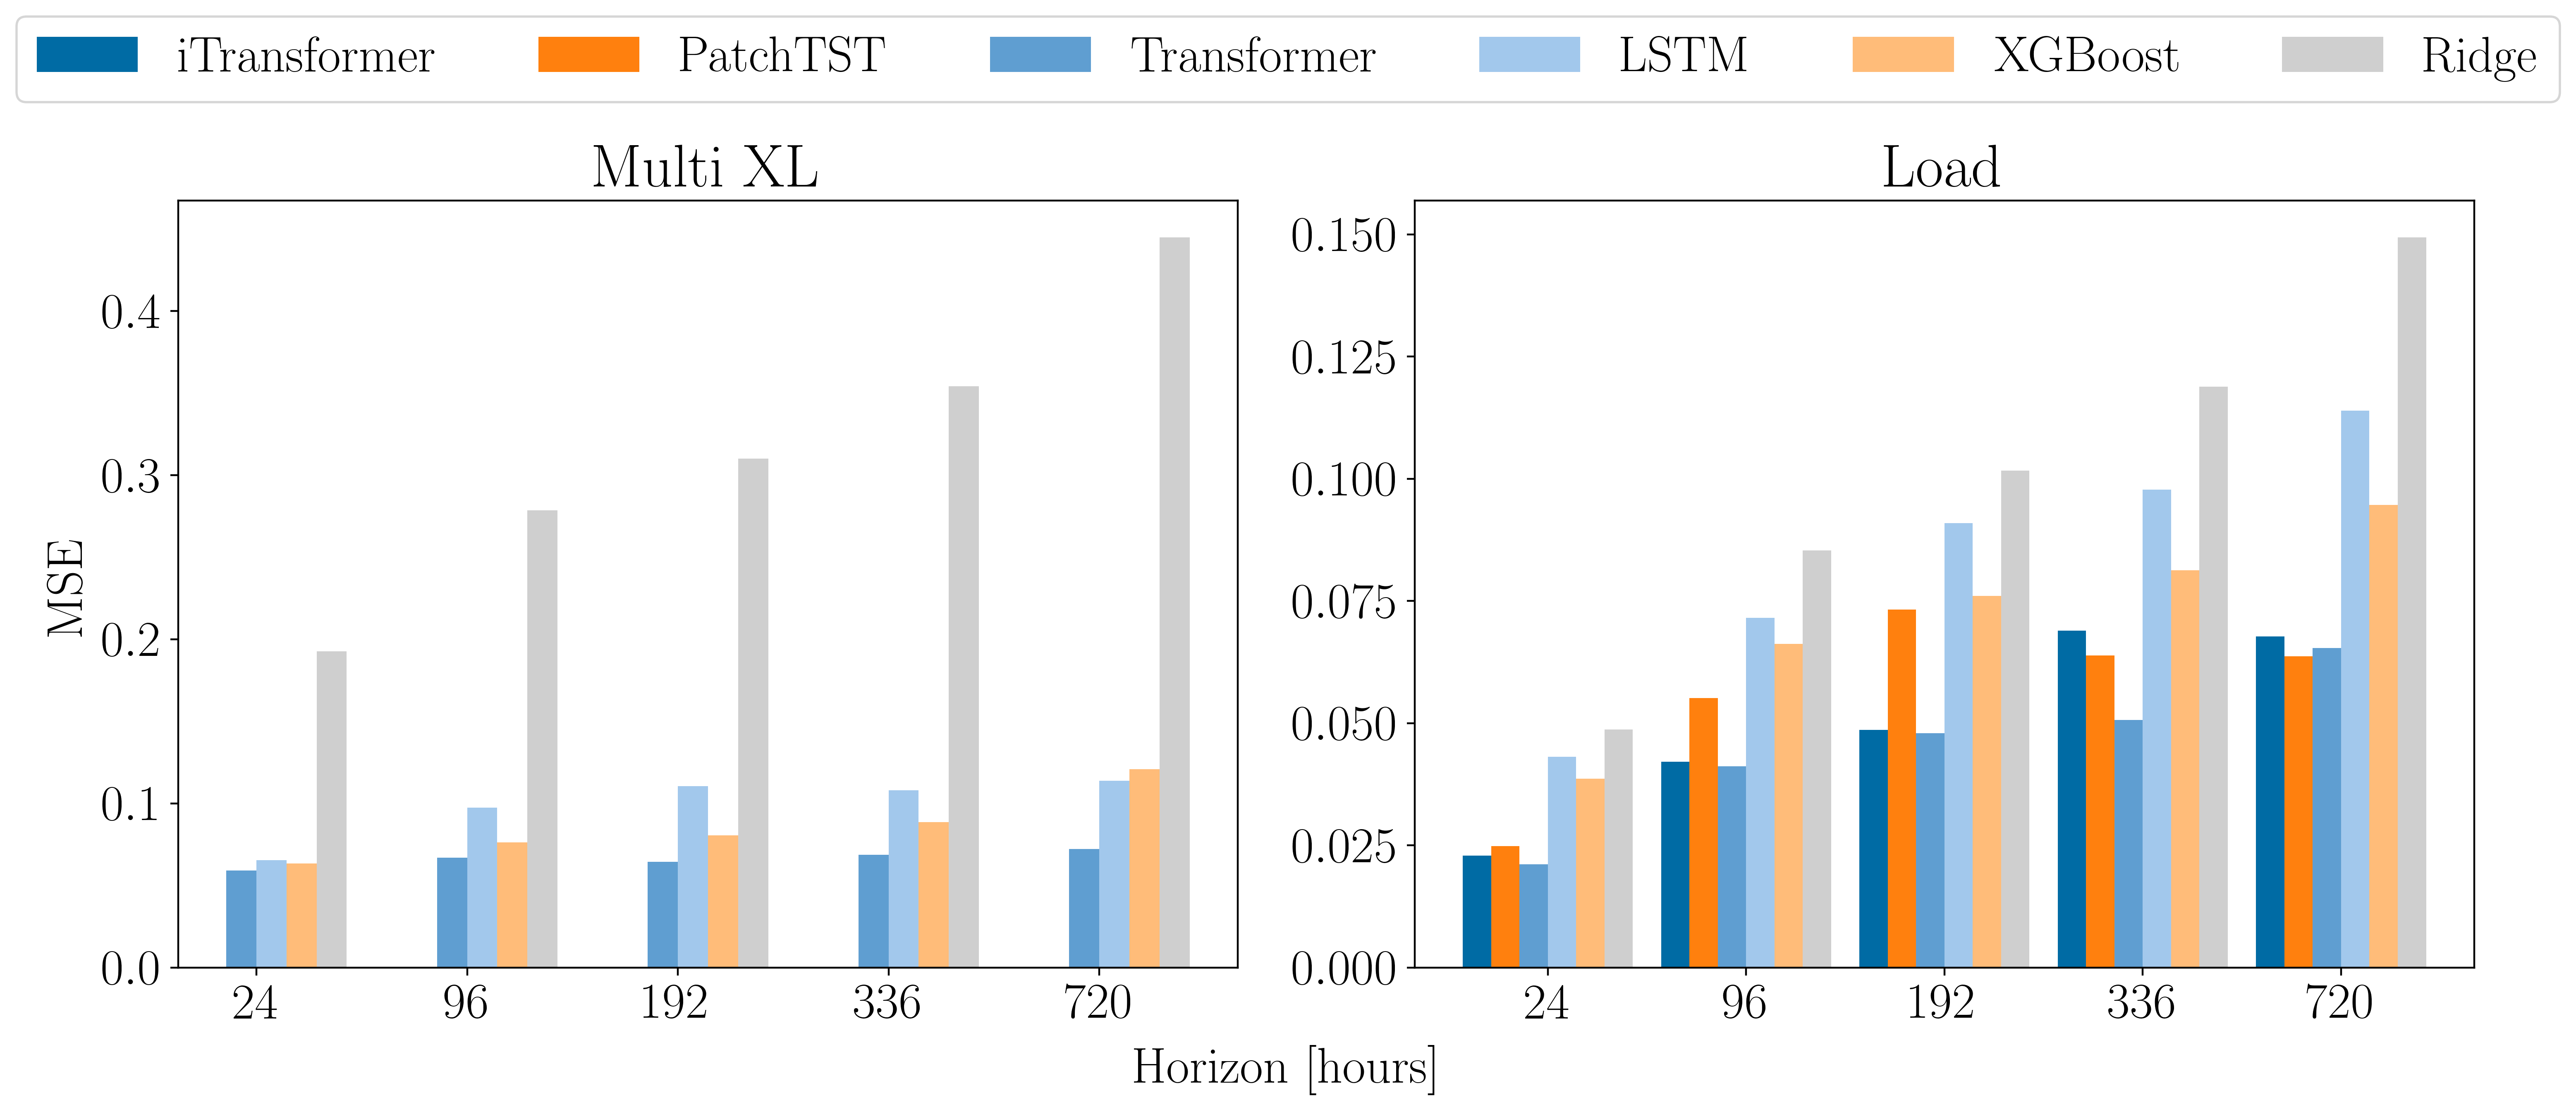

In [109]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # Adjusted size for better visibility of bars

# Example colors for the models
#colors = ["#1f77b4", "#17becf", "#2ca02c", "#e377c2", "#bcbd22", "#7f7f7f"]

# Example data
# Assuming each bm_mse for each i is a DataFrame where columns are models and rows are horizons
for i, (bm_mse, bm_mae) in enumerate(bms):
    #horizons = np.arange(bm_mse.shape[0])  # Number of horizons
    bar_width = 1 / (len(bm_mse.columns) + 1)  # Width of each bar, adjusted for number of models
    #bar_width = 0.1
    for j, model in enumerate(bm_mse.columns):
        # Position of each bar grouped by horizon
        positions = np.arange(bm_mse.shape[0]) + j * bar_width

        # Plotting the bar for each model at each horizon
        ax[i].bar(positions, bm_mse[model], width=bar_width, color=color_map[model], label=model if i == 0 else "")

    ax[i].set_title("Multi XL" if i==0 else "Load")
    ax[i].set_xticks(np.arange(bm_mse.shape[0]) + bar_width * (len(bm_mse.columns) - 1) / 2)  # Setting x-ticks to be at the center of the group
    #print(horizons)
    ax[i].set_xticklabels([f'{x}' for x in horizons])  # Assuming horizons are like 0h, 1h, etc.
    #ax[i].set_xlabel('Horizon [hours]')

#f.legend(loc='upper')  # Only one legend
fig.legend(models, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=6)

fig.text(0.5, 0, 'Horizon [hours]', ha='center')
fig.text(0, 0.5, 'MSE', va='center', rotation='vertical')
fig.tight_layout()
plt.show()



How much does Transformer outperform second best model on average?

In [110]:
benchmark_table

Model          iTransformer         PatchTST         Transformer          \
Metric                  MSE     MAE      MSE     MAE         MSE     MAE   
Target Horizon                                                             
multi  24               NaN     NaN      NaN     NaN      0.0592  0.1596   
       96               NaN     NaN      NaN     NaN      0.0670  0.1688   
       192              NaN     NaN      NaN     NaN      0.0643  0.1685   
       336              NaN     NaN      NaN     NaN      0.0688  0.1762   
       720              NaN     NaN      NaN     NaN      0.0722  0.1809   
load   24            0.0229  0.1040   0.0248  0.1057      0.0211  0.1098   
       96            0.0421  0.1385   0.0551  0.1603      0.0412  0.1520   
       192           0.0486  0.1523   0.0732  0.1842      0.0479  0.1666   
       336           0.0689  0.1831   0.0638  0.1743      0.0506  0.1743   
       720           0.0677  0.1856   0.0637  0.1750      0.0654  0.1964   

Model             LSTM         XGBoost           Ridge          
Metric             MSE     MAE     MSE     MAE     MSE     MAE  
Target Horizon                                                  
multi  24       0.0654  0.1717  0.0634  0.1611  0.1926  0.2973  
       96       0.0973  0.2168  0.0763  0.1789  0.2785  0.3616  
       192      0.1105  0.2310  0.0806  0.1843  0.3100  0.3814  
       336      0.1079  0.2289  0.0886  0.1943  0.3542  0.4106  
       720      0.1139  0.2361  0.1209  0.2287  0.4450  0.4761  
load   24       0.0431  0.1451  0.0386  0.1384  0.0487  0.1453  
       96       0.0715  0.1907  0.0662  0.1770  0.0853  0.1919  
       192      0.0909  0.2207  0.0760  0.1892  0.1017  0.2130  
       336      0.0978  0.2313  0.0813  0.1969  0.1188  0.2427  
       720      0.1139  0.2559  0.0946  0.2123  0.1494  0.2902

## MultiXL: Skill score over XGBoost

In [111]:
skill_table = 1 - benchmark_table.xs("multi", level=0, axis=0) / benchmark_table.xs("multi", level=0, axis=0).xs("XGBoost", level=0, axis=1)
avgs = skill_table.mean(axis=0)
# Mean over all Metrics (level =1, axis=0)
#print(avg)
avg = (avgs.xs("MAE", level=1, axis=0) + avgs.xs("MSE", level=1, axis=0)) / 2
print(avg)

Model
iTransformer         NaN
PatchTST             NaN
Transformer     0.147031
LSTM           -0.157915
XGBoost         0.000000
Ridge          -1.834367
dtype: float64


## Load: Skill score over XGBoost

In [112]:
skill_table = 1 - benchmark_table.xs("load", level=0, axis=0) / benchmark_table.xs("load", level=0, axis=0).xs("XGBoost", level=0, axis=1)
avgs = skill_table.mean(axis=0)
# Mean over all Metrics (level =1, axis=0)
#print(avg)
avg = (avgs.xs("MAE", level=1, axis=0) + avgs.xs("MSE", level=1, axis=0)) / 2
print(avg)

Model
iTransformer    0.242514
PatchTST        0.175144
Transformer     0.254404
LSTM           -0.147204
XGBoost         0.000000
Ridge          -0.278824
dtype: float64


## Load: Skill score over second best model

In [113]:
skill_table = 1 - benchmark_table.xs("load", level=0, axis=0) / benchmark_table.xs("load", level=0, axis=0).xs("iTransformer", level=0, axis=1)
avgs = skill_table.mean(axis=0)
# Mean over all Metrics (level =1, axis=0)
#print(avg)
avg = (avgs.xs("MAE", level=1, axis=0) + avgs.xs("MSE", level=1, axis=0)) / 2
print(avg)

Model
iTransformer    0.000000
PatchTST       -0.104286
Transformer     0.015670
LSTM           -0.541589
XGBoost        -0.346939
Ridge          -0.724670
dtype: float64


In [114]:


avg_table = benchmark_table.xs("multi", level=0, axis=0).sum(axis=0)/benchmark_table.xs("multi", level=0, axis=0).shape[0]

avg_mse = avg_table.loc[pd.IndexSlice[:, 'MSE']]
#avg_mae = avg_table.loc[pd.IndexSlice[:, 'MAE']]
#avg = (avg_mse + avg_mae) / 2
avg = avg_mse
imp_over_base = round((1- (avg / avg.loc["XGBoost"])) * 100).astype(int)
imp_over_base


Model
iTransformer    100
PatchTST        100
Transformer      23
LSTM            -15
XGBoost           0
Ridge          -268
dtype: int64

In [115]:
avg_table = benchmark_table.xs("load", level=0, axis=0).sum(axis=0)/benchmark_table.xs("load", level=0, axis=0).shape[0]

avg_mse = avg_table.loc[pd.IndexSlice[:, 'MSE']]
avg_mae = avg_table.loc[pd.IndexSlice[:, 'MAE']]
avg = (avg_mse + avg_mae) / 2
imp_over_base = round((1- (avg / avg.loc["XGBoost"])) * 100).astype(int)
imp_over_base

Model
iTransformer    20
PatchTST        15
Transformer     19
LSTM           -15
XGBoost          0
Ridge          -25
dtype: int64

IMP and best model counter not used. 

IMP over best baseline (load, multi)

IMP over second best model (load)


In [116]:
#multivatiate case
mu_transformer_MSE = 
print((0.059 / 0.063 + 0.067 / 0.076 + 0.064 / 0.081 + 0.069 / 0.089 + 0.072 / 0.114) / 5 + ())

#univariate case
print((0.021 / 0.023 + 0.041 / 0.042 + 0.048 / 0.049 + 0.051 / 0.064 + 0.065 / 0.064) / 5) 

#univariate best attention based vs best baseline
print((0.021 / 0.039 + 0.041 / 0.066 + 0.048 / 0.076 + 0.051 / 0.081 + 0.064 / 0.095) / 5) 

SyntaxError: invalid syntax (354094559.py, line 2)

In [ ]:
print()